<font color="blue" size ="6"><b>WELCOME TO MACHINE LEARNING AUTOMATION WORKSHOP</b></font>

<font color="yellow" size="4"><b>Example 3: Traditional Approach Clustering </b></font>

In [1]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import (
    silhouette_score,
    davies_bouldin_score,
    calinski_harabasz_score,
    adjusted_rand_score,
    normalized_mutual_info_score,
    homogeneity_score,
    completeness_score,
    v_measure_score
)
from sklearn.model_selection import train_test_split
import pandas as pd

In [2]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target  # Ground truth

In [3]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X)

In [4]:
# Calculate Internal Metrics
silhouette_avg = silhouette_score(X, y_kmeans)
davies_bouldin = davies_bouldin_score(X, y_kmeans)
calinski_harabasz = calinski_harabasz_score(X, y_kmeans)

In [5]:
# Calculate External Metrics (using ground truth)
adjusted_rand = adjusted_rand_score(y, y_kmeans)
normalized_mutual_info = normalized_mutual_info_score(y, y_kmeans)
homogeneity = homogeneity_score(y, y_kmeans)
completeness = completeness_score(y, y_kmeans)
v_measure = v_measure_score(y, y_kmeans)

In [6]:
# Display the results
results = pd.DataFrame({
    "Metric": [
        "Silhouette Coefficient",
        "Davies-Bouldin Index",
        "Calinski-Harabasz Index",
        "Adjusted Rand Index",
        "Normalized Mutual Information",
        "Homogeneity",
        "Completeness",
        "V-Measure"
    ],
    "Score": [
        silhouette_avg,
        davies_bouldin,
        calinski_harabasz,
        adjusted_rand,
        normalized_mutual_info,
        homogeneity,
        completeness,
        v_measure
    ]
})

print(results)

                          Metric       Score
0         Silhouette Coefficient    0.552819
1           Davies-Bouldin Index    0.661972
2        Calinski-Harabasz Index  561.627757
3            Adjusted Rand Index    0.730238
4  Normalized Mutual Information    0.758176
5                    Homogeneity    0.751485
6                   Completeness    0.764986
7                      V-Measure    0.758176


1. Optimize the Number of Clusters
a. Elbow Method
The Elbow Method helps determine the optimal number of clusters by plotting Within-Cluster Sum of Squares (WCSS) for different cluster counts.

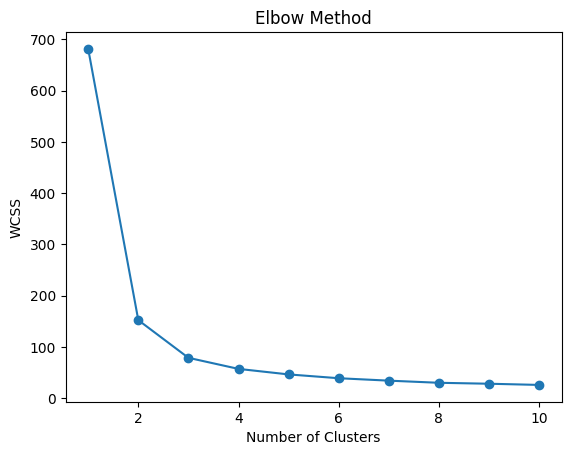

In [7]:
import matplotlib.pyplot as plt

wcss = []
range_clusters = range(1, 11)

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range_clusters, wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

b. Silhouette Analysis Silhouette scores can identify the optimal number of clusters by checking cluster cohesion and separation.

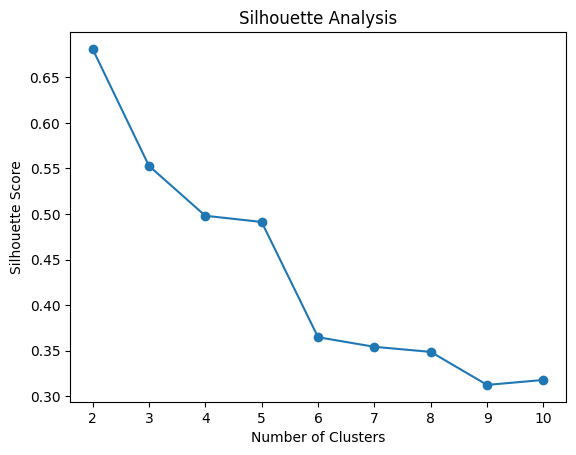

In [8]:
from sklearn.metrics import silhouette_samples
import numpy as np
range_clusters = range(2, 11)
silhouette_avgs = []
for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_avgs.append(silhouette_avg)
plt.plot(range_clusters, silhouette_avgs, marker='o')
plt.title('Silhouette Analysis')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

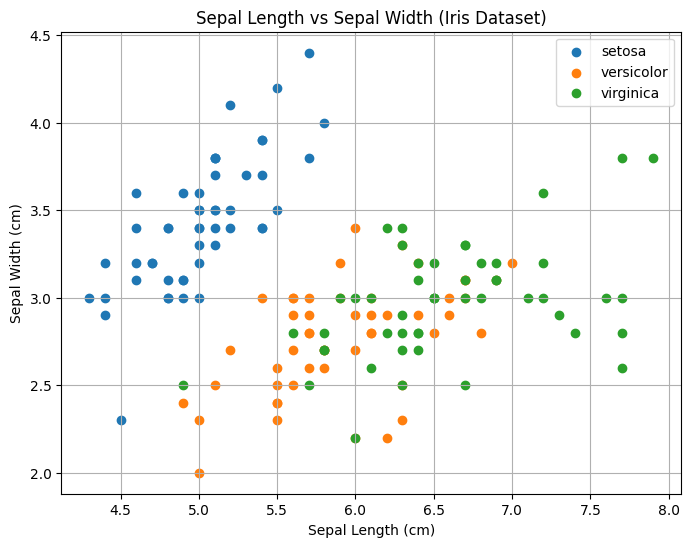

In [9]:
import matplotlib.pyplot as plt
from sklearn import datasets

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Plot Sepal Length vs Sepal Width
plt.figure(figsize=(8,6))

for i, target_name in enumerate(target_names):
    plt.scatter(X[y == i, 0], X[y == i, 1], label=target_name)

plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.title("Sepal Length vs Sepal Width (Iris Dataset)")
plt.legend()
plt.grid(True)
plt.show()
